<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [5]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [43]:
# Calculate the total number of columns after one-hot encoding
total_columns_after_encoding = (
    df['Orbit'].nunique() +
    df['LaunchSite'].nunique() +
    df['LandingPad'].nunique() +
    df['Serial'].nunique()
)

print(total_columns_after_encoding)


72


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


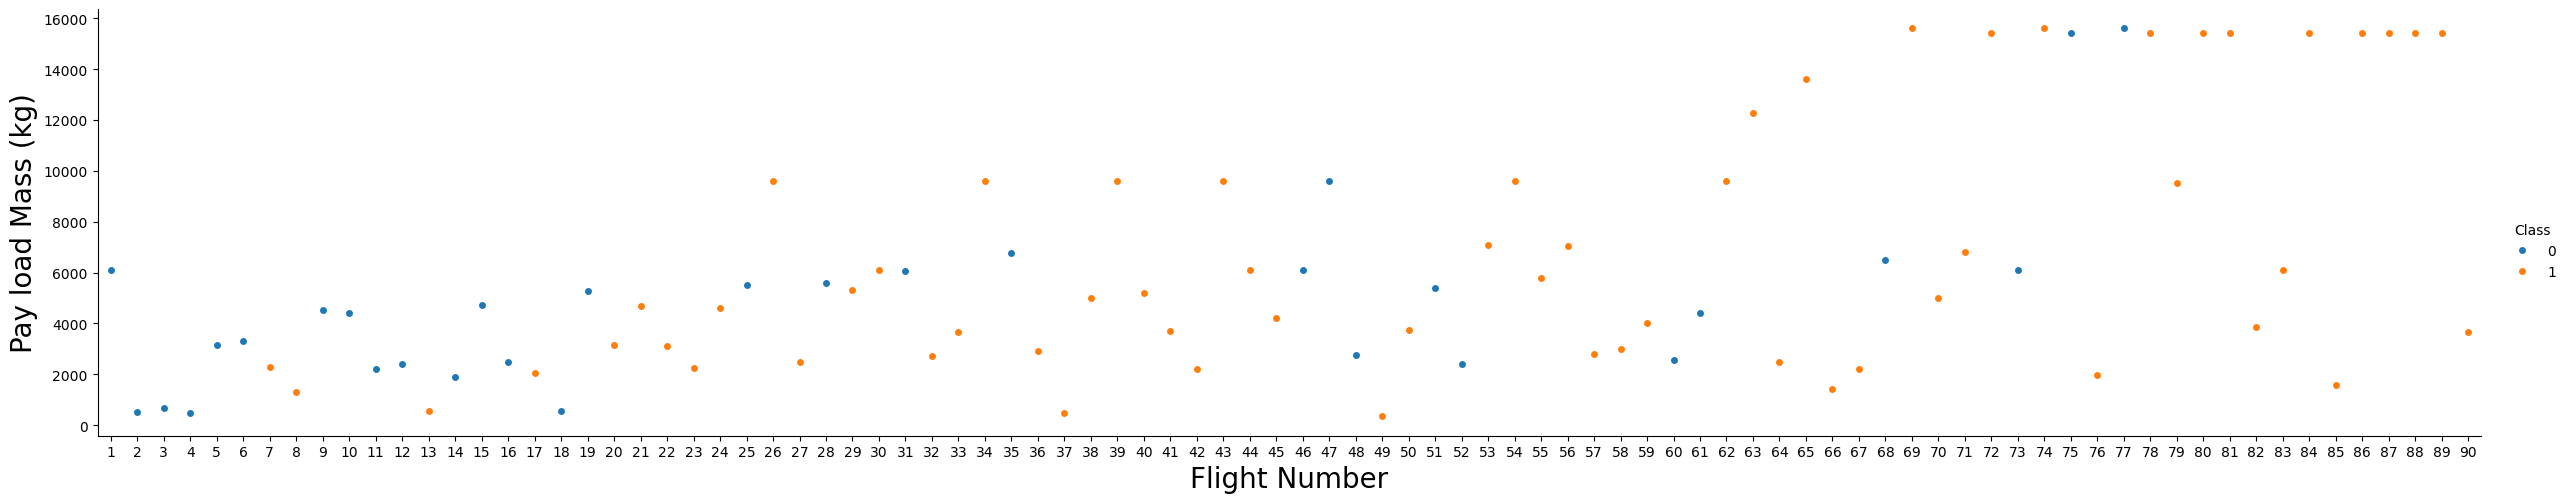

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


<Figure size 1200x600 with 0 Axes>

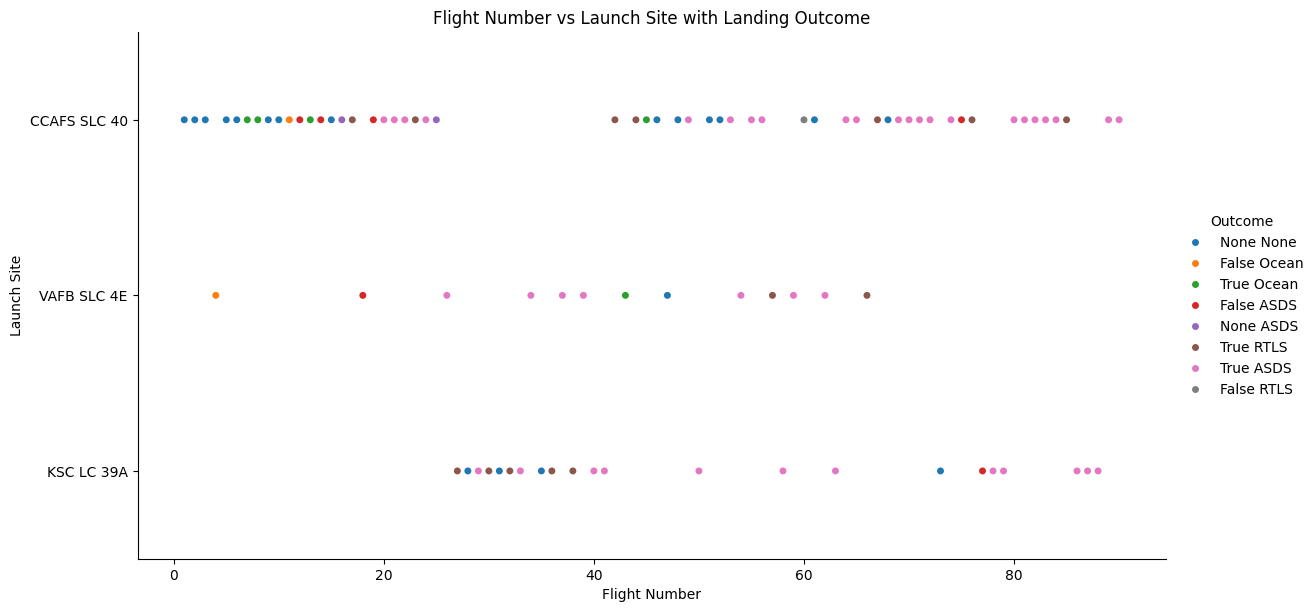

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.catplot(data=df, x='FlightNumber', y='LaunchSite', hue='Outcome', height=6, aspect=2, kind='swarm')
plt.title('Flight Number vs Launch Site with Landing Outcome')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()


Next, let's drill down to each site visualize its detailed launch records.


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


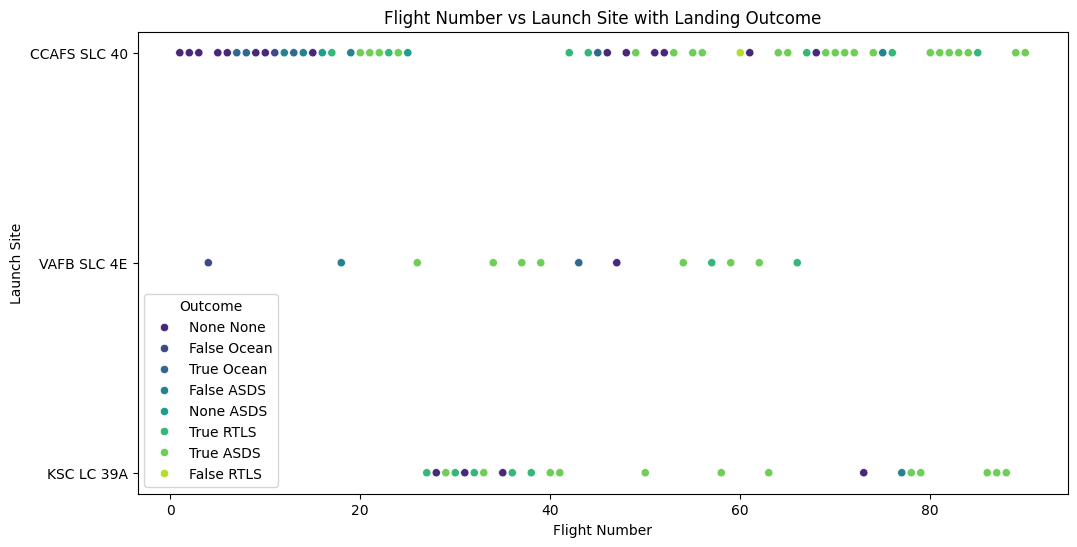

In [8]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Outcome', palette='viridis')
plt.title('Flight Number vs Launch Site with Landing Outcome')
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.show()


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


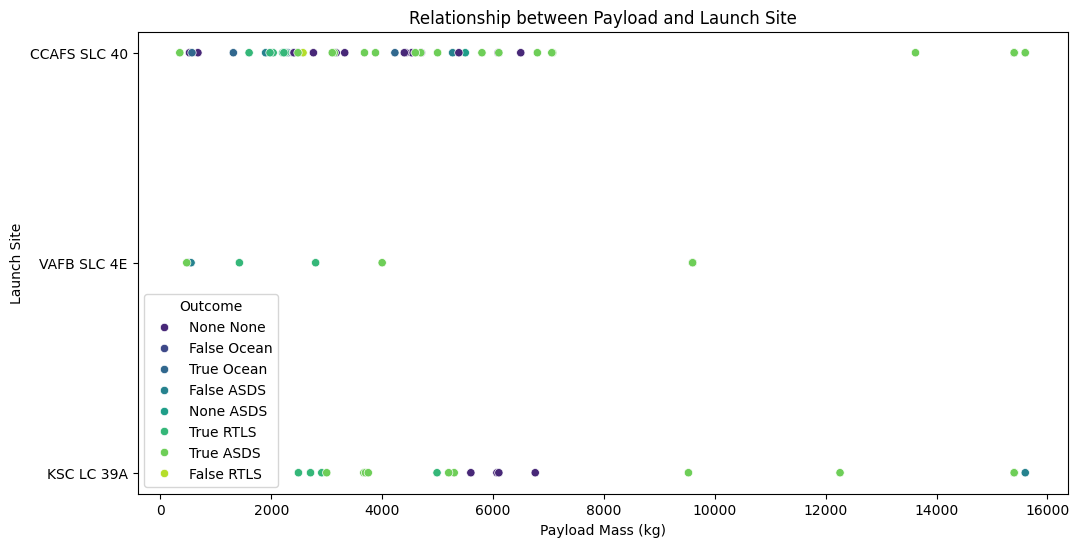

In [9]:
### TASK 2: Visualize the relationship between Payload and Launch Site
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Outcome', palette='viridis')
plt.title('Relationship between Payload and Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


We also want to observe if there is any relationship between launch sites and their payload mass.


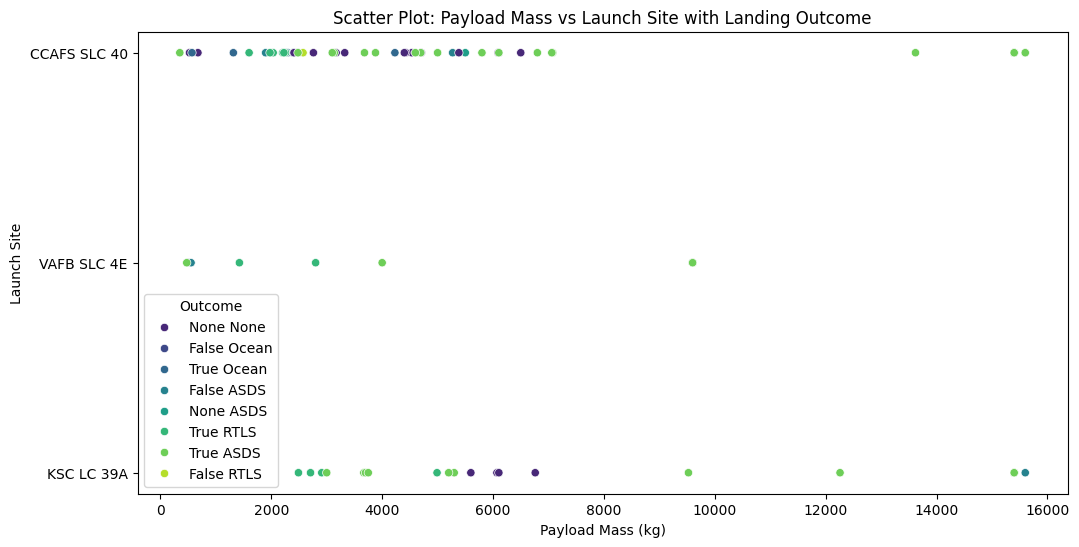

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Outcome', palette='viridis')
plt.title('Scatter Plot: Payload Mass vs Launch Site with Landing Outcome')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site')
plt.show()


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


<ipython-input-11-aa10fac67840>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Outcome', palette='viridis')


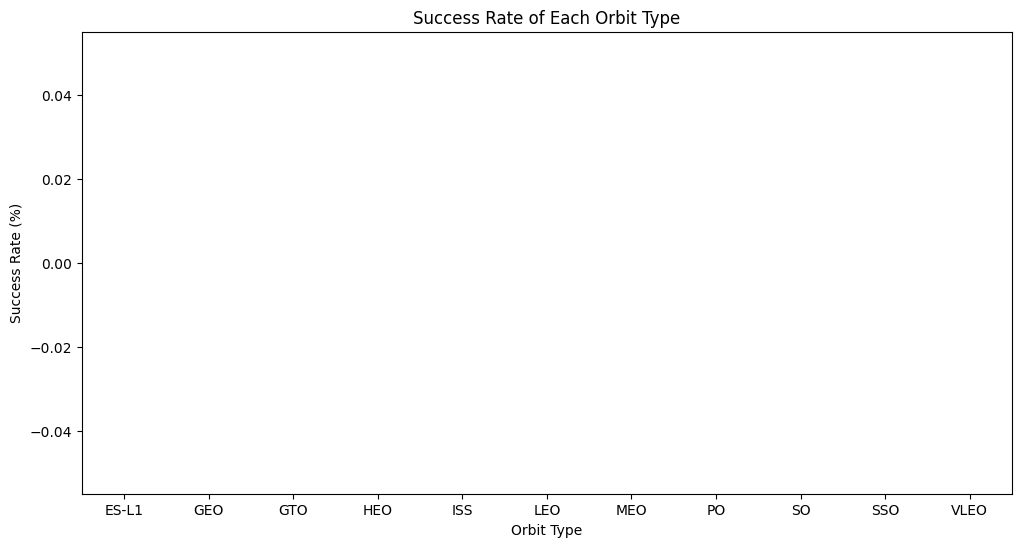

In [11]:
### TASK  3: Visualize the relationship between success rate of each orbit type
import seaborn as sns
import matplotlib.pyplot as plt

orbit_success_rate = df.groupby('Orbit')['Outcome'].apply(lambda x: (x == 'Success').mean() * 100).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Outcome', palette='viridis')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate (%)')
plt.show()


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [16]:
unique_outcome_values = df['Outcome'].unique()
print(unique_outcome_values)


['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']


<ipython-input-18-67fa8f9e1a22>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Success', palette='viridis')


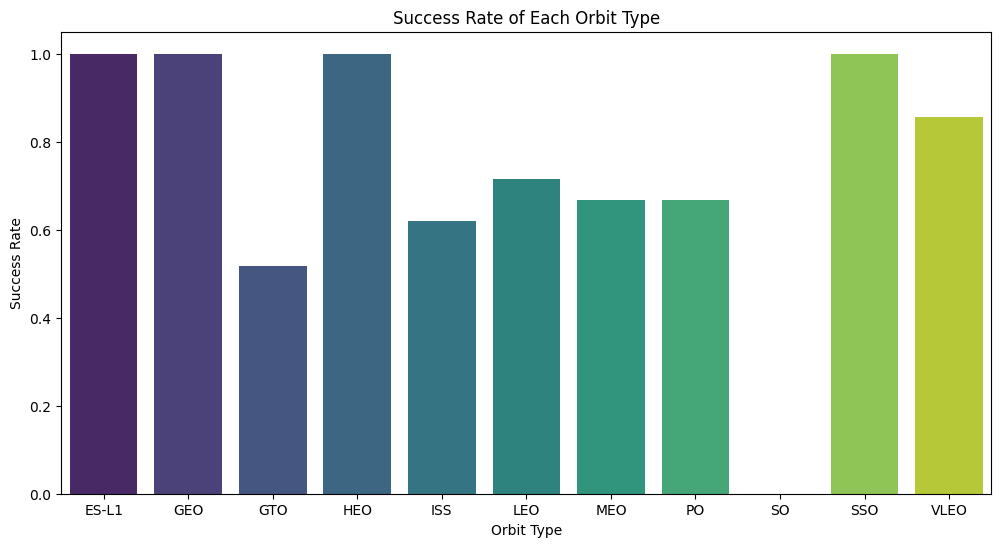

In [18]:
# HINT use groupby method on Orbit column and get the mean of Class colum
import seaborn as sns
import matplotlib.pyplot as plt

df['Success'] = df['Outcome'].isin(['True Ocean', 'True RTLS', 'True ASDS'])

orbit_success_rate = df.groupby('Orbit')['Success'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Success', palette='viridis')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()



Analyze the ploted bar chart try to find which orbits have high sucess rate.


<ipython-input-19-3f9ebfd2e15e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orbit_success_rate, x='Orbit', y='Success', palette='viridis')


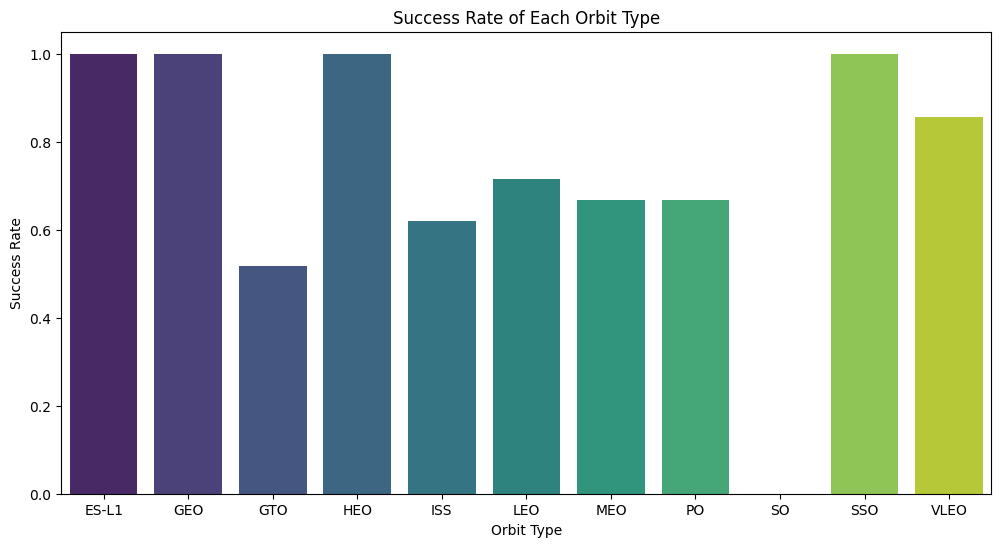

In [19]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type
import seaborn as sns
import matplotlib.pyplot as plt

df['Success'] = df['Outcome'].str.startswith('True')

orbit_success_rate = df.groupby('Orbit')['Success'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=orbit_success_rate, x='Orbit', y='Success', palette='viridis')
plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.show()


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


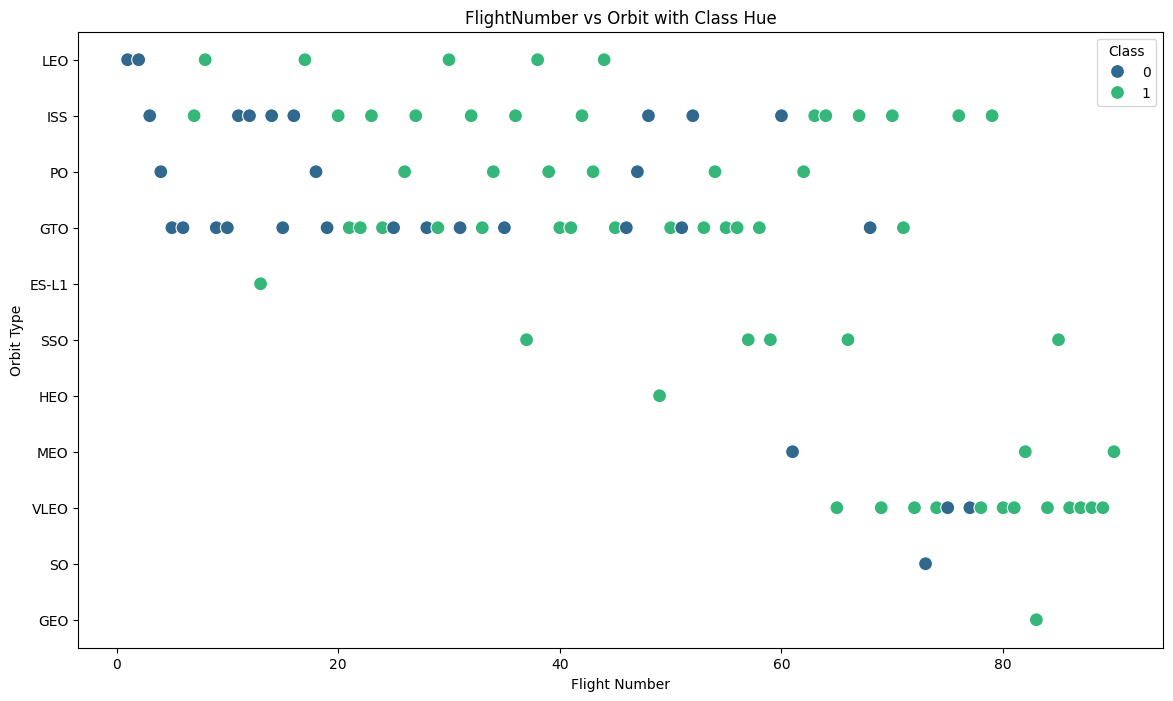

In [22]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatter point chart
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='viridis', s=100)
plt.title('FlightNumber vs Orbit with Class Hue')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Class', loc='upper right')
plt.show()


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


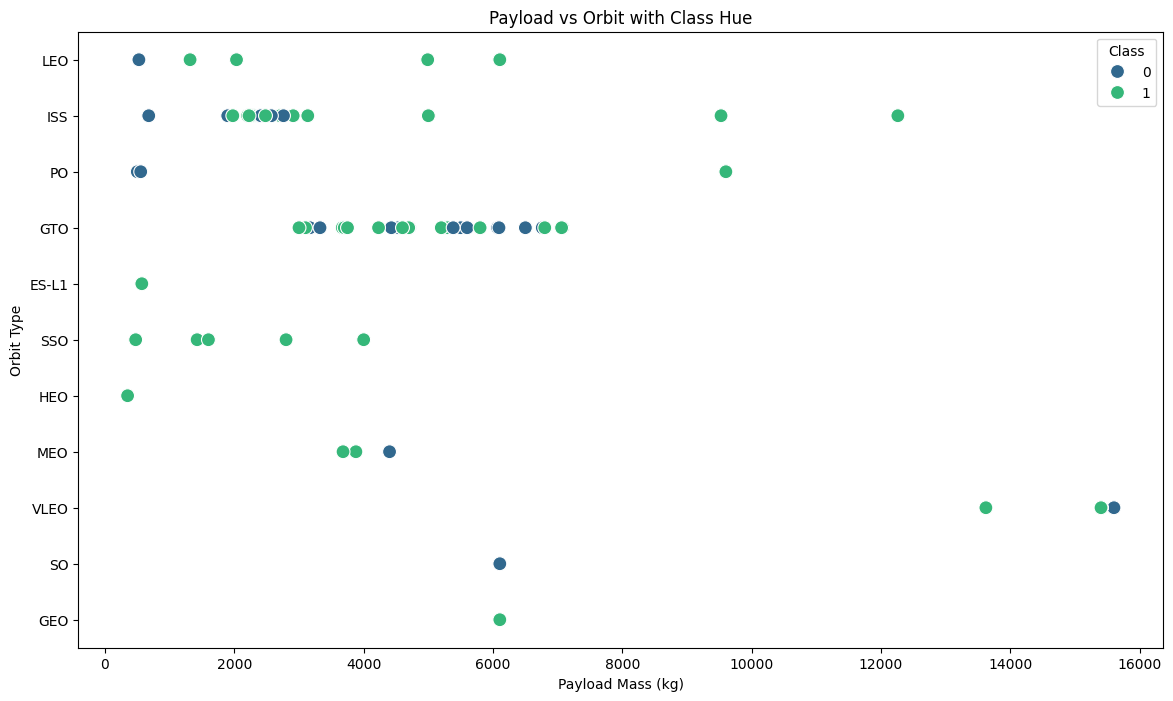

In [25]:
### TASK  5: Visualize the relationship between Payload and Orbit type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', s=100)
plt.title('Payload vs Orbit with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Class', loc='upper right')
plt.show()


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


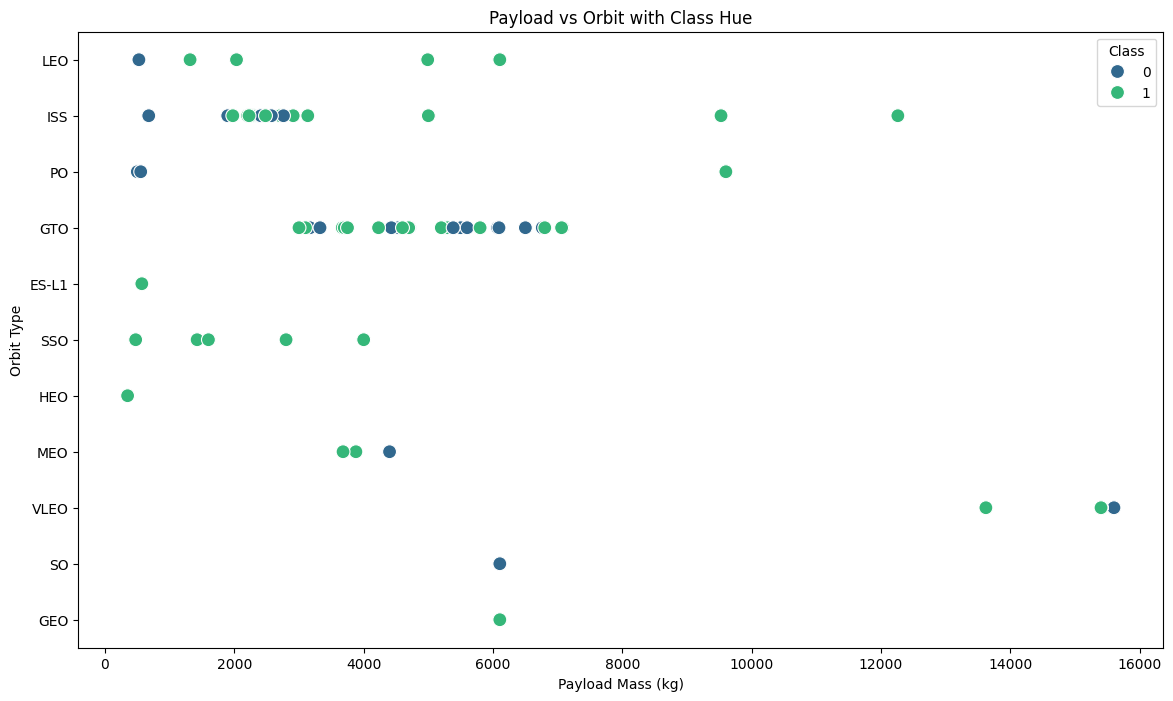

In [26]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the scatter point chart
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='viridis', s=100)
plt.title('Payload vs Orbit with Class Hue')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit Type')
plt.legend(title='Class', loc='upper right')
plt.show()


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


FlightNumber               int64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Orbit                     object
LaunchSite                object
Outcome                   object
Flights                    int64
GridFins                    bool
Reused                      bool
Legs                        bool
LandingPad                object
Block                    float64
ReusedCount                int64
Serial                    object
Longitude                float64
Latitude                 float64
Class                      int64
Success                     bool
dtype: object


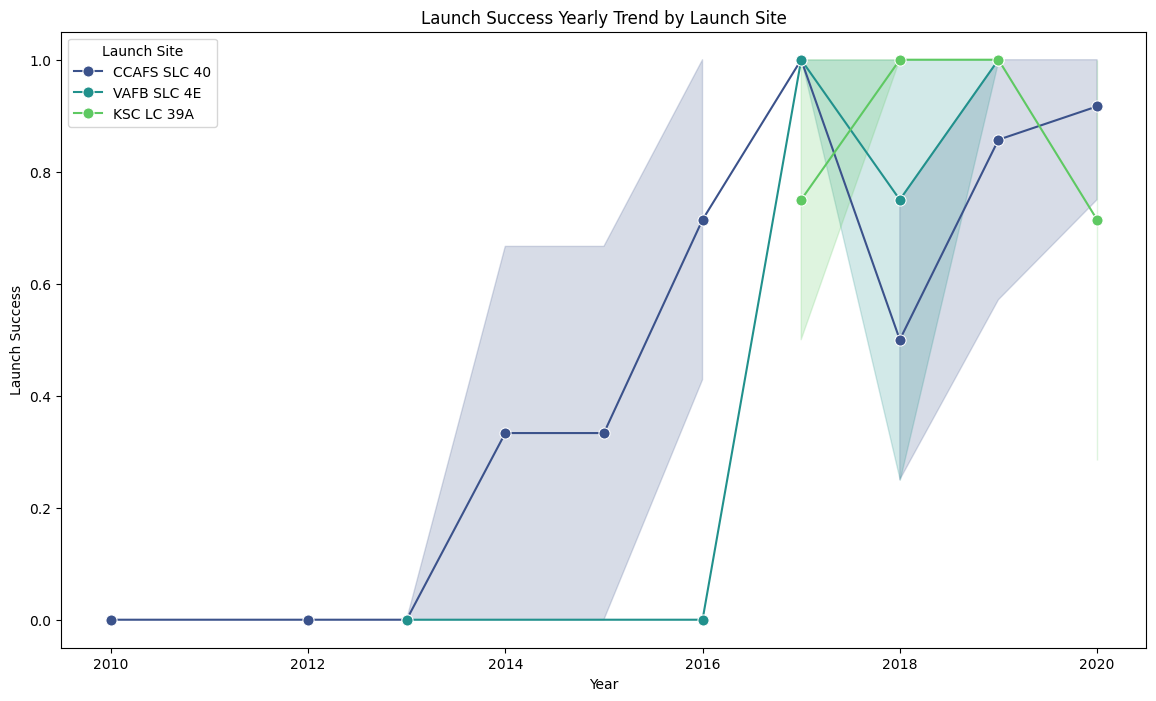

In [28]:
### TASK  6: Visualize the launch success yearly trend
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Import pandas
import numpy as np   # Import numpy

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Check the data types again
print(df.dtypes)

# Create 'Year' column
df['Year'] = df['Date'].dt.year

# Plotting the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Year', y='Class', hue='LaunchSite', marker='o', markersize=8, palette='viridis')
plt.title('Launch Success Yearly Trend by Launch Site')
plt.xlabel('Year')
plt.ylabel('Launch Success')
plt.legend(title='Launch Site', loc='upper left')
plt.show()


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [30]:
import pandas as pd

# Assuming df is your DataFrame

# Convert 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and create a new 'Year' column
df['Year'] = df['Date'].dt.year

# Display the DataFrame
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Success,Year
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,False,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,False,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,False,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,False,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,False,2013


<ipython-input-31-62c15ab92ae5>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly_success_rate, x='Year', y='Class', marker='o', markersize=8, palette='viridis')


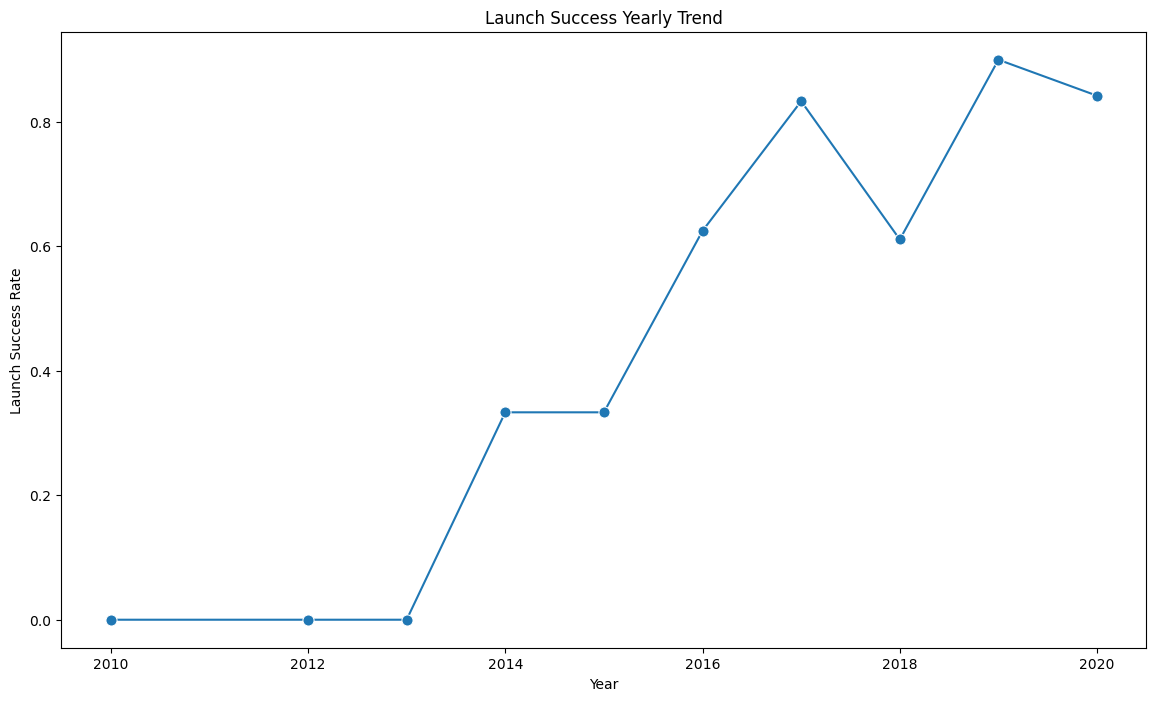

In [31]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
import seaborn as sns
import matplotlib.pyplot as plt


yearly_success_rate = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_success_rate, x='Year', y='Class', marker='o', markersize=8, palette='viridis')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Launch Success Rate')
plt.show()


you can observe that the sucess rate since 2013 kept increasing till 2020


In [ ]:
## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [32]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [34]:
### TASK  7: Create dummy variables to categorical columns
import pandas as pd


categorical_columns = ['LaunchSite', 'Orbit', 'Outcome']

df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_dummies.head())


   FlightNumber       Date BoosterVersion  PayloadMass  Flights  GridFins  \
0             1 2010-06-04       Falcon 9  6104.959412        1     False   
1             2 2012-05-22       Falcon 9   525.000000        1     False   
2             3 2013-03-01       Falcon 9   677.000000        1     False   
3             4 2013-09-29       Falcon 9   500.000000        1     False   
4             5 2013-12-03       Falcon 9  3170.000000        1     False   

   Reused   Legs LandingPad  Block  ...  Orbit_SO Orbit_SSO  Orbit_VLEO  \
0   False  False        NaN    1.0  ...         0         0           0   
1   False  False        NaN    1.0  ...         0         0           0   
2   False  False        NaN    1.0  ...         0         0           0   
3   False  False        NaN    1.0  ...         0         0           0   
4   False  False        NaN    1.0  ...         0         0           0   

   Outcome_False Ocean  Outcome_False RTLS  Outcome_None ASDS  \
0                    

Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [36]:
# HINT: Use get_dummies() function on the categorical columns
import pandas as pd


categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

features_one_hot = pd.get_dummies(df[categorical_columns], drop_first=True)

df_encoded = pd.concat([df, features_one_hot], axis=1)

print(df_encoded.head())


   FlightNumber       Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1 2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2 2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3 2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4 2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5 2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused  ...  Serial_B1048 Serial_B1049  \
0    None None        1     False   False  ...             0            0   
1    None None        1     False   False  ...             0            0   
2    None None        1     False   False  ...             0            0   
3  False Ocean        1     False   False  ...             0            0   
4    None None        1     False   False  ...             0            0   

   Serial_B1050  Serial_B1051 Serial_B1054  Serial_B1056  Serial_B10

In [38]:
### TASK  8: Cast all numeric columns to `float64`
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_columns] = df[numeric_columns].astype('float64')
print(df[numeric_columns])

    FlightNumber   PayloadMass  Flights  Block  ReusedCount   Longitude  \
0            1.0   6104.959412      1.0    1.0          0.0  -80.577366   
1            2.0    525.000000      1.0    1.0          0.0  -80.577366   
2            3.0    677.000000      1.0    1.0          0.0  -80.577366   
3            4.0    500.000000      1.0    1.0          0.0 -120.610829   
4            5.0   3170.000000      1.0    1.0          0.0  -80.577366   
..           ...           ...      ...    ...          ...         ...   
85          86.0  15400.000000      2.0    5.0          2.0  -80.603956   
86          87.0  15400.000000      3.0    5.0          2.0  -80.603956   
87          88.0  15400.000000      6.0    5.0          5.0  -80.603956   
88          89.0  15400.000000      3.0    5.0          2.0  -80.577366   
89          90.0   3681.000000      1.0    5.0          0.0  -80.577366   

     Latitude  Class    Year  
0   28.561857    0.0  2010.0  
1   28.561857    0.0  2012.0  
2   28

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [42]:
# HINT: use astype function
numeric_columns = df.select_dtypes(include='number').columns

df[numeric_columns] = df[numeric_columns].astype('float64')

non_numeric_columns = df.columns.difference(numeric_columns)
df[non_numeric_columns] = df[non_numeric_columns].astype('object')
print(df[non_numeric_columns])

   BoosterVersion                 Date GridFins                LandingPad  \
0        Falcon 9  2010-06-04 00:00:00    False                       NaN   
1        Falcon 9  2012-05-22 00:00:00    False                       NaN   
2        Falcon 9  2013-03-01 00:00:00    False                       NaN   
3        Falcon 9  2013-09-29 00:00:00    False                       NaN   
4        Falcon 9  2013-12-03 00:00:00    False                       NaN   
..            ...                  ...      ...                       ...   
85       Falcon 9  2020-09-03 00:00:00     True  5e9e3032383ecb6bb234e7ca   
86       Falcon 9  2020-10-06 00:00:00     True  5e9e3032383ecb6bb234e7ca   
87       Falcon 9  2020-10-18 00:00:00     True  5e9e3032383ecb6bb234e7ca   
88       Falcon 9  2020-10-24 00:00:00     True  5e9e3033383ecbb9e534e7cc   
89       Falcon 9  2020-11-05 00:00:00     True  5e9e3032383ecb6bb234e7ca   

      LaunchSite   Legs Orbit      Outcome Reused Serial Success  
0   CCAF

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
